#**Exploratory Data Analysis (EDA) on Retail Sales Data**

###**1.Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**2.Load the dataset**

In [30]:
file_path = '/content/retail_sales_dataset.csv'
data = pd.read_csv(file_path)

print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
# numerical columns
numerical_data = data.select_dtypes(exclude = ['object']).columns
print("Numerical columns: ",numerical_data)
# categorical columns
categorical_data = data.select_dtypes(include = ['object']).columns
print("Categorical columns: ",categorical_data)

Numerical columns:  Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')
Categorical columns:  Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


###**Data cleaning**

In [5]:
# Check datatypes of each column and convert to appropriate data types
print(data.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [6]:
# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].dtype)

datetime64[ns]


In [7]:
print(data.dtypes)

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [8]:
#checking for unique values
data.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


In [9]:
# Check for missing values
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [11]:
data.shape

(1000, 9)

In [12]:
# Check for outliers in numerical columns
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numerical_cols:
    # Example using IQR method for outlier detection
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print(data.shape) # no outliers present

(1000, 9)


In [13]:
# Display the first 5 rows of cleaned data
print(data.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


###**Descriptive statistics**

In [14]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


###**Time Series Analysis**

In [15]:
print(data.head())

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [16]:
# Reset the index and move the current index (Date) back into a column
data_reset = data.reset_index()

# Check the result
print(data_reset.head())


   index  Transaction ID       Date Customer ID  Gender  Age Product Category  \
0      0               1 2023-11-24     CUST001    Male   34           Beauty   
1      1               2 2023-02-27     CUST002  Female   26         Clothing   
2      2               3 2023-01-13     CUST003    Male   50      Electronics   
3      3               4 2023-05-21     CUST004    Male   37         Clothing   
4      4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [17]:
# Create a 'Year-Month' column to group by both year and month
data_reset['Year-Month'] = data_reset['Date'].dt.to_period('M')

# Calculate total sales for each month
data_reset['Total Sales'] = data_reset['Quantity'] * data_reset['Price per Unit']
monthly_sales = data_reset.groupby('Year-Month')['Total Sales'].sum().reset_index()


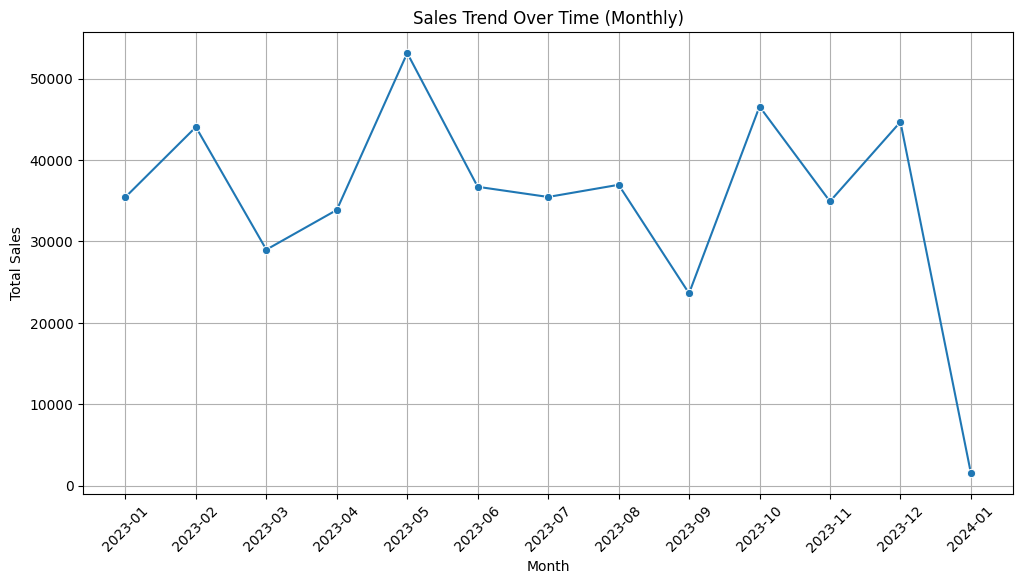

In [ ]:
# Convert 'Year-Month' to string for proper plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month', y='Total Sales', data=monthly_sales, marker='o')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Analysis**

---



**Observation:** Significant fluctuation in each month, with a clear drop in January 2024.

**Recommendations:**
Look into why sales dropped in January 2024, like seasonal changes, promotions, or problems with inventory. Create specific marketing campaigns during months when sales are lower to even out the changes. Find the best-selling months and use them for more promotions or to launch new products.

###**Customer and Product Analysis**

###**1.Customer demographics Analysis**

**1.Gender distribution**

The distribution of male and female customers

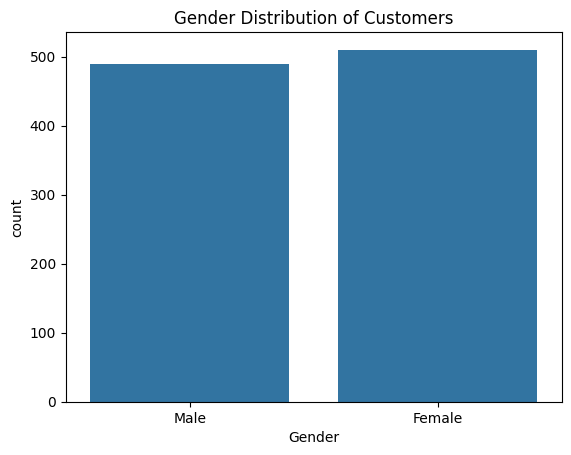

In [18]:
sns.countplot(x='Gender', data=data_reset)
plt.title('Gender Distribution of Customers')
plt.show()


The bar chart shows a slight majority of female customers compared to male customers.










**2.Age distribution**

The distribution of age in terms of frequency

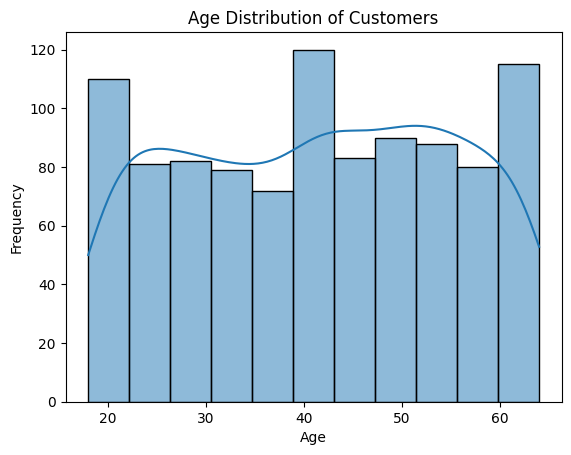

In [19]:
sns.histplot(data_reset['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution of customers shows multiple peaks, suggesting a diverse customer base with several distinct age groups

**3.Age and Gender Relationship**

Age distribution of each gender

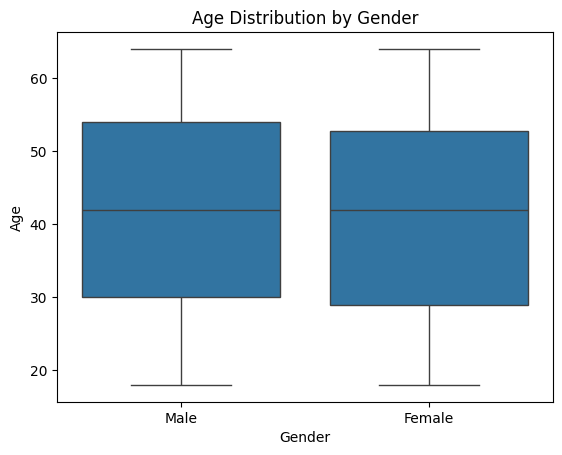

In [20]:
# Age vs Gender plot
sns.boxplot(x='Gender', y='Age', data=data_reset)
plt.title('Age Distribution by Gender')
plt.show()

The boxplot shows a similar age distribution between male and female customers with both genders having a median age around 45 years.

###**2.Product Analysis**

**1.Distribution of product categories**  
This bar chart shows which categories are  most popular among customers

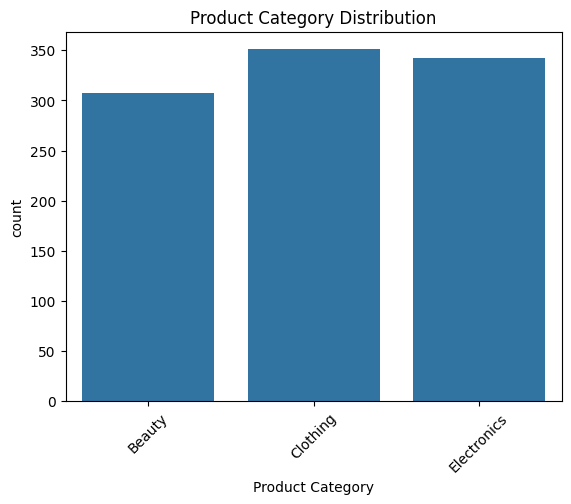

In [21]:
# Product category distribution
sns.countplot(x='Product Category', data=data_reset)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the distribution of product categories. Clothing and Electronics are the most popular categories with similar counts, while Beauty has the lowest count

**2.Total sales per product category**

This bar plot shows which product categories contribute the most to overall sales.

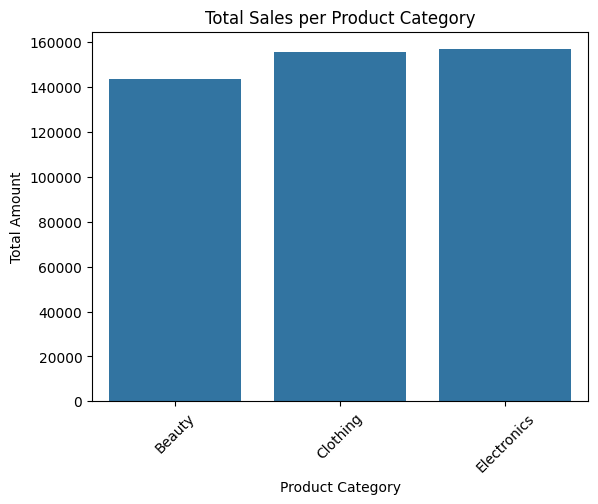

In [22]:
# Total sales per product category
category_sales = data_reset.groupby('Product Category')['Total Amount'].sum().reset_index()
sns.barplot(x='Product Category', y='Total Amount', data=category_sales)
plt.title('Total Sales per Product Category')
plt.xticks(rotation=45)
plt.show()

**Analysis**

---



Electronics has the highest total sales, followed by Clothing and then Beauty.

**Recommendation**: Look at pricing strategies for each category to make more profit. Think about changing prices in the Beauty category to boost its revenue.

**3.Quantity purchased by product**

This chart shows which categories are being sold in large quantities, regardless of their price.

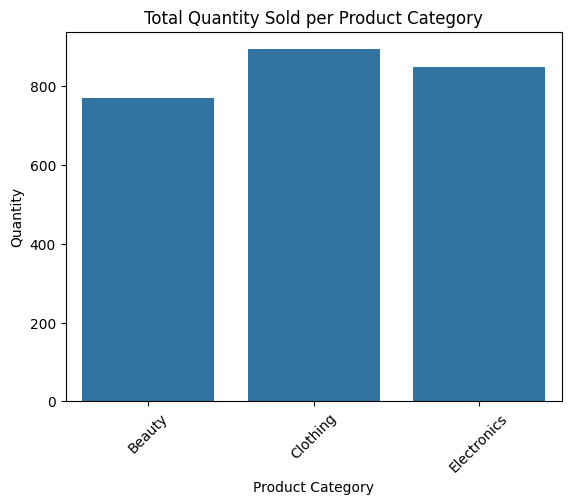

In [23]:
# Total quantity sold per product category
quantity_sales = data_reset.groupby('Product Category')['Quantity'].sum().reset_index()
sns.barplot(x='Product Category', y='Quantity', data=quantity_sales)
plt.title('Total Quantity Sold per Product Category')
plt.xticks(rotation=45)
plt.show()

**Analysis**

---



Clothing has the highest total quantity sold, followed by Electronics and then Beauty.

**Recommendation**: Add more products in the lines of Clothing and Electronics since those are best-selling. Even when selling beauty, combine them with the popular ones to increase sales.

###**3.Customer purchasing behaviour Analysis**

**1. Average Total Amount per Customer**

 This plot will give you insights into how much customers generally spend, helping you identify high-spenders.

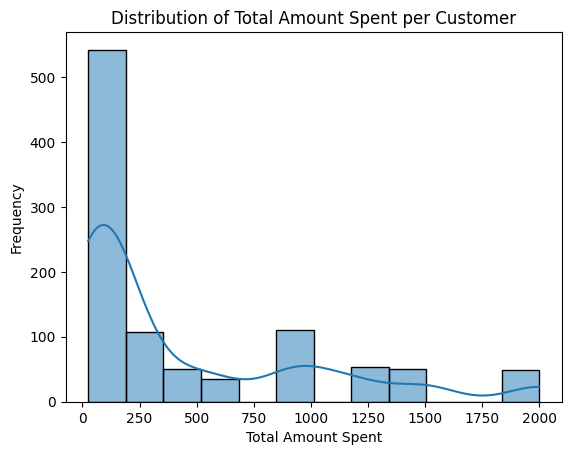

In [24]:
# Average total amount spent per customer
customer_spending = data_reset.groupby('Customer ID')['Total Amount'].sum().reset_index()
sns.histplot(customer_spending['Total Amount'], kde=True)
plt.title('Distribution of Total Amount Spent per Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()


**Analysis**

---



**Right-skewed distribution**: This simply means that the majority of the customers buy smaller quantities, whereas fewer customers purchase larger quantities.

**Recommendation**: Develop a loyalty program with stages that offer rewards to customers spending a lot of money. That way, they will keep coming back and possibly buying again.


**2.Average Quantity Purchased per Customer**

This histogram will show how many items customers tend to buy in general, highlighting frequent buyers.

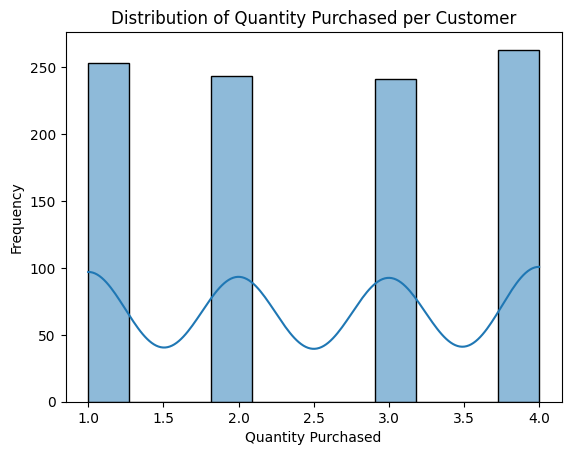

In [25]:
# Average quantity purchased per customer
customer_quantity = data_reset.groupby('Customer ID')['Quantity'].sum().reset_index()
sns.histplot(customer_quantity['Quantity'], kde=True)
plt.title('Distribution of Quantity Purchased per Customer')
plt.xlabel('Quantity Purchased')
plt.ylabel('Frequency')
plt.show()


**Analysis**


---


Customers tend to buy in specified quantities, and mostly, they are buying 1, 2, or 3 units.

**Recommendation**: Product bundles or related items are offered when the customer's usual buying quantities are reached, which encourages customers to buy more. For instance, a "starter pack" has 1, a "combo pack" 2, and a "family pack" of 3 products.

**3.Frequency of Purchases per Customer**

This plot will show how often customers are purchasing items, which can help identify loyal customers or those making occasional purchases.

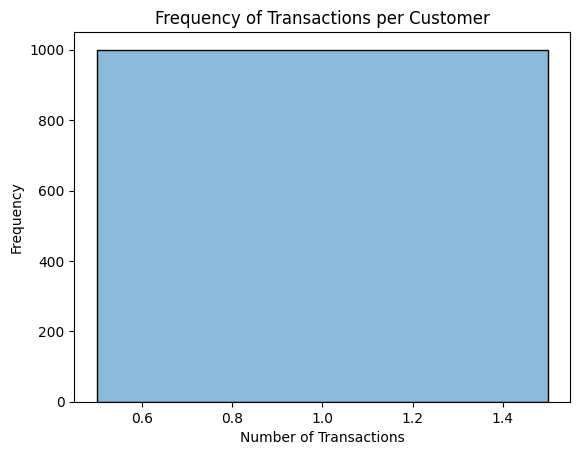

In [26]:
# Number of transactions per customer
customer_transactions = data_reset.groupby('Customer ID').size().reset_index(name='Transaction Count')
sns.histplot(customer_transactions['Transaction Count'], kde=True)
plt.title('Frequency of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


**Analysis**

---



Majority of customers have a consistent number of transactions.


**Recommendation**:Review the existing loyalty program to encourage repeat purchase and reward customers who have purchased high-value. Consider tiered loyalty programs, where benefits are increased with increased levels of engagement.

###**4. Combining Demographics with Purchasing Behavior**

**1.Gender and Total Amount Spent**

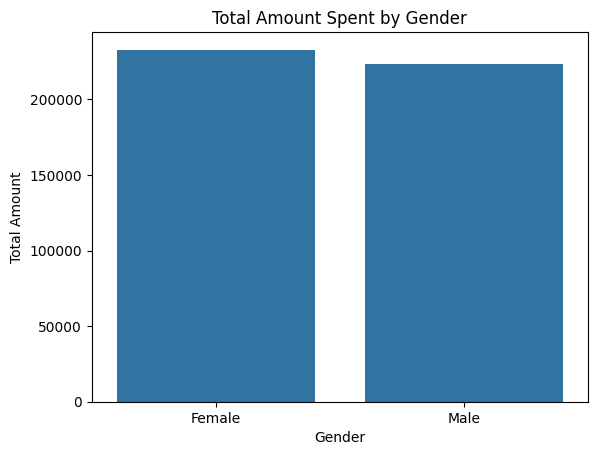

In [ ]:
# Total amount spent by gender
gender_spending = data.groupby('Gender')['Total Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Total Amount', data=gender_spending)
plt.title('Total Amount Spent by Gender')
plt.show()


The bar chart shows that female customers have spent a slightly higher total amount compared to male customers

**2.Age and Product Category**

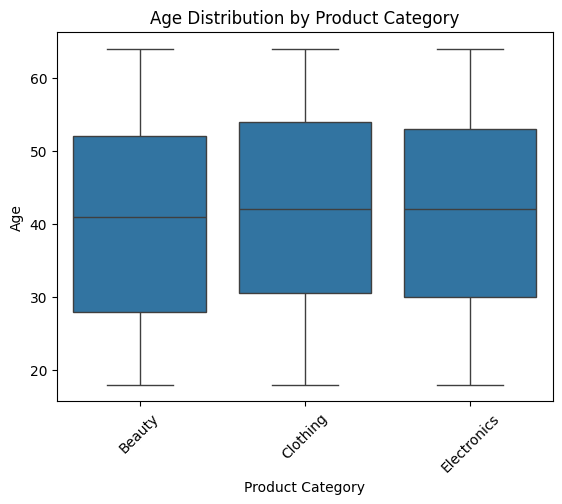

In [ ]:
# Age vs Product Category
sns.boxplot(x='Product Category', y='Age', data=data)
plt.title('Age Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()


**Analysis**

---



Similar age distributions across categories: The median age for all three categories (Beauty, Clothing, and Electronics) is around 45 years old, with similar interquartile ranges.

**Recommendation**: Instead of age, try to group the customers based on their buying history, how much they spend, and how often they buy. This will enable more personalized marketing and product recommendation.

###**Visualization**

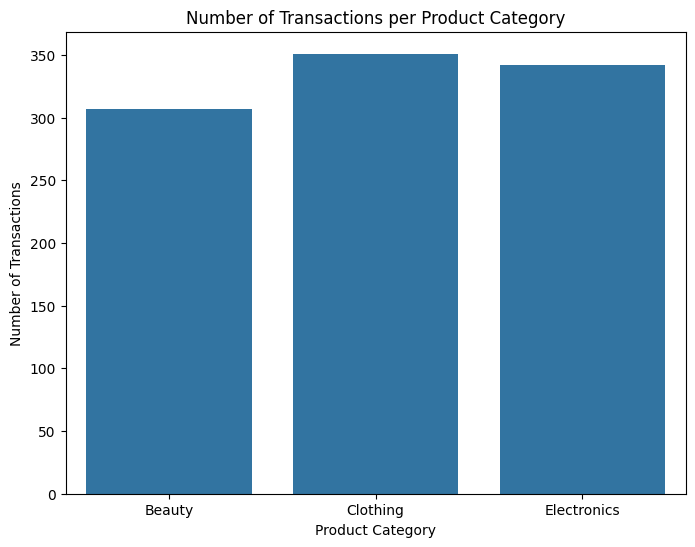

In [27]:
# 1. Bar chart: Number of transactions per product category
plt.figure(figsize=(8, 6))
sns.countplot(x='Product Category', data=data_reset)
plt.title('Number of Transactions per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.show()

**Analysis**

---



**Observation**: Clothing and Electronics have the highest number of transactions, with Beauty slightly lower.

**Recommendations:**
Provide more products under the categories of Clothing and Electronics since they are popular. Selling Beauty products together with popular products will help in sales increase. Check on customer feedback of Beauty products for what may be a hindrance for customers to purchase more.

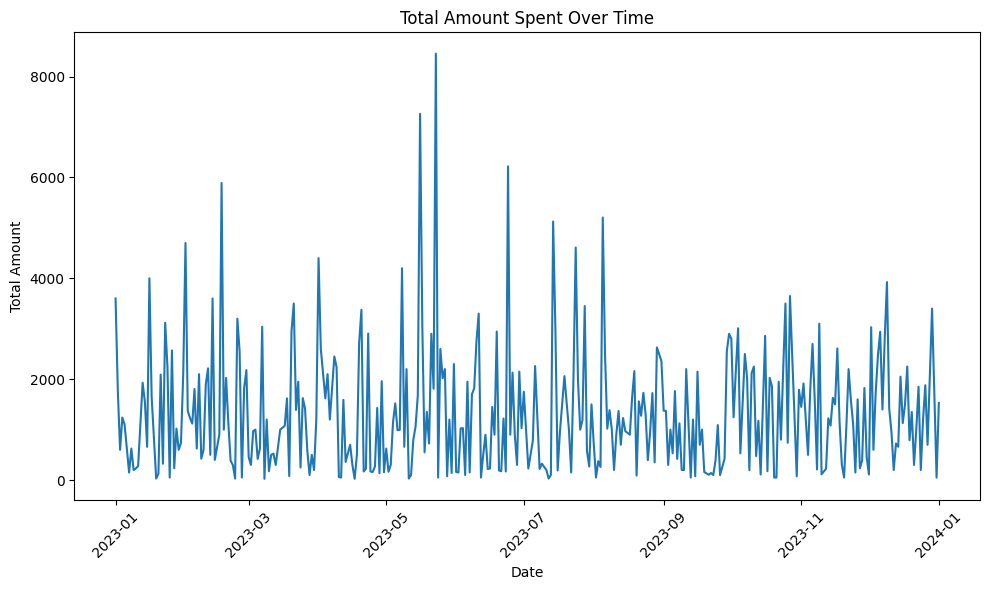

In [28]:
# 2. Line plot: Total amount spent over time
data_time_series = data_reset.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(data_time_series.index, data_time_series.values)
plt.title('Total Amount Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis**

---
Fluctuating spending with a significant spike in 2023-05: This suggests that specific events or promotions may have influenced spending patterns.

**Recommendation**: Look into why spending spiked around 2023-05. Was there a specific event or promotion that drove the increase? Understanding the cause will help to replicate the successful strategies.


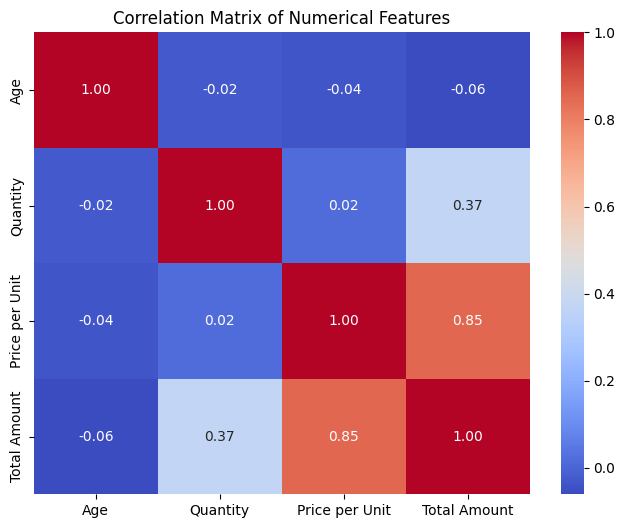

In [29]:
# 3. Heatmap: Correlation matrix
# Select numerical features for correlation analysis
numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Analysis**

---



**Observation:**
Strong positive correlation between Price per Unit and Total Amount (0.85), indicating that higher-priced items contribute significantly to total sales.
Moderate correlation between Quantity and Total Amount (0.37), suggesting bulk purchases play a role in revenue.
Weak or no significant correlation between Age and other variables.

**Recommendations:**
Utilize dynamic pricing or selective price discounts on higher-priced items for revenue optimization. Promote buying in bulk deals to enhance transactions, mainly through moderately correlated items. Marketing with age could prove ineffective unless deeper segmentation further brings out the characteristic behavior of target groups.